<a href="https://colab.research.google.com/github/KaRtHiK-56/Machine-Learning-Projects/blob/main/FakeNewsDetectionCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**
COVID-19 is believed to be caused by a novel coronavirus called SARS-CoV-2, which was initially discovered in Wuhan, China in December 2019, and has quickly spread throughout the world. WHO declared the outbreak a Public Health Emergency of International Concern on January 30, 2020 and characterized COVID-19 as a pandemic on March 11, 2020. As of May 6, 2020, more than 3.5 million cases of COVID-19 and almost 250,000 deaths worldwide have been reported to WHO. Common symptoms of COVID-19 includes cough, shortness of breath,fever, sore throat, and loss of taste or smell.

As the COVID-19 virus quickly spreads around the world, unfortunately, misinformation related to COVID-19 also gets created and spreads like wild fire. Such misinformation has caused confusion among people, disruptions in society, and even deadly consequences in health problems. To be able to understand, detect, and mitigate such COVID-19 misinformation, therefore, has not only deep intellectual values but also huge societal impacts. To help researchers combat COVID-19 health misinformation.


#**LIFE CYCLE OF THIS PROJECT**
1. Framing Problem Statement
2. Data Collection
3. Data Preprocessing
4. Exploratory Data Analysis
5. Feature Engineering
6. Feature Selection
7. Model creation
8. Hyperparameter Tuning
9. Deployment


#**Defining the problem Statement**

As the COVID-19 virus quickly spreads around the world, unfortunately, misinformation related to COVID-19 also gets created and spreads like wild fire. Such misinformation has caused confusion among people, disruptions in society, and even deadly consequences in health problems.

To be able to understand, detect, and mitigate such COVID-19 misinformation, therefore, has not only deep intellectual values but also huge societal impacts. Inorder to solve issue this NLP based Machine learning model is created to avoid the misleading information.



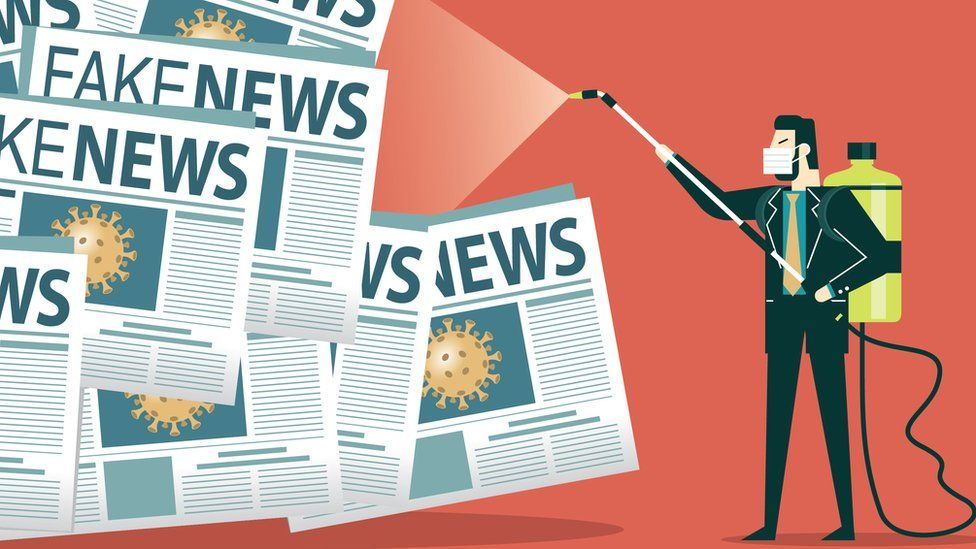

#**Data Collection**
The dataset that i have used in this part is collected from a github repository.
It already had collected a dataset which has covid19 fake news information. The link to the repo is given below.

[Covid-19 Fake NEWS Detection Dataset](https://github.com/MiHarsh/Public_stuffs/blob/master/Constraint_English_Val%20-%20Sheet1.csv)



#**Data Preprocessing**

In [201]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [202]:
#loading the dataset
data = pd.read_csv('c19fnd.csv')
data

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake
2136,2137,Current understanding is #COVID19 spreads most...,real
2137,2138,Nothing screams “I am sat around doing fuck al...,fake
2138,2139,Birx says COVID-19 outbreak not under control ...,fake


In [203]:
#viewing the dimentions of the dataset
data.shape

(2140, 3)

In [204]:
#viewing the no. elements in the dataset
data.size

6420

In [205]:
#getting the statistical summary of the data
data.describe()

,id
count,2140.000000
mean,1070.500000
std,617.909109
min,1.000000
25%,535.750000
50%,1070.500000
75%,1605.250000
max,2140.000000


In [206]:
#getting the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [207]:
#getting column name
data.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [208]:
#seeing the datatypes of the dataset
data.dtypes

id        int64
tweet    object
label    object
dtype: object

In [209]:
#checking for null values
data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [210]:
#checking for missing values
data.duplicated().sum()

0

#Observations
1. This dataset has 2140 rows of datas and 3 features which is id,tweet and lable.
2. Lable is the dependent variable that we are going to predict.
3. There is no missing values or datas present in the dataset.

#**Exploratory Data Analysis**



In [211]:
#Dependent variable visualisation
bar = data['label'].value_counts()
bar = pd.DataFrame(bar)
bar

,label
real,1120
fake,1020


<Axes: title={'center': 'Count of Label'}, xlabel='Label', ylabel='Count'>

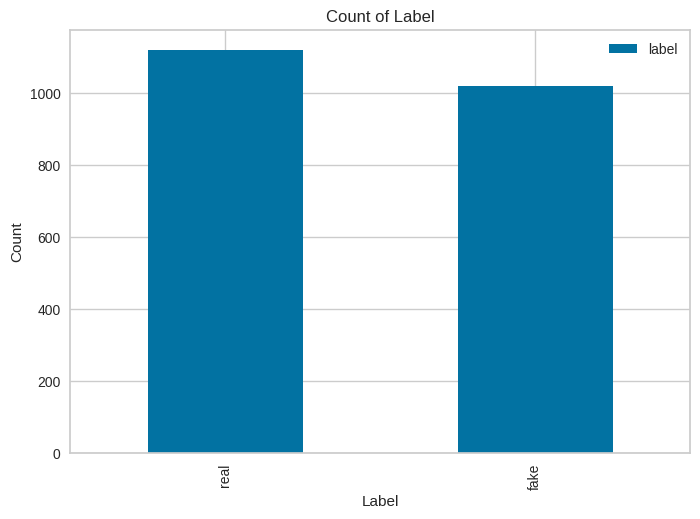

In [212]:
bar.plot(kind='bar',xlabel='Label',ylabel='Count',title='Count of Label')

In [213]:
#removing not informative words(stopwords) and preprocessing the text data
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [214]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [216]:
stopwords  = [['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]]

In [217]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#**Feature Engineering**

In [218]:
#removing non informative words(stopwords and doing some basic text preprocessing methods)
corpus = []
for i in range(len(data)):
  processing = re.sub('[^a-zA-Z]',' ',data['tweet'][i])
  processing = processing.lower()
  processing = processing.split()
  processing = [ps.stem(word) for word in processing if not word in stopwords]
  processing = ' '.join(processing)
  corpus.append(processing)

In [219]:
data['corpus'] = pd.DataFrame(corpus)
data

,id,tweet,label,corpus
0,1,Chinese converting to Islam after realising th...,fake,chines convert to islam after realis that no m...
1,2,11 out of 13 people (from the Diamond Princess...,fake,out of peopl from the diamond princess cruis s...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake,covid is caus by a bacterium not viru and can ...
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake,mike penc in rnc speech prais donald trump s c...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real,sky s edconwayski explain the latest covid dat...
...,...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake,donald trump wrongli claim that new zealand ha...
2136,2137,Current understanding is #COVID19 spreads most...,real,current understand is covid spread mostli from...
2137,2138,Nothing screams “I am sat around doing fuck al...,fake,noth scream i am sat around do fuck all dure l...
2138,2139,Birx says COVID-19 outbreak not under control ...,fake,birx say covid outbreak not under control beca...


In [220]:
print(data['tweet'][0])
print('$'*60)
print(data['corpus'][0])

Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
chines convert to islam after realis that no muslim wa affect by coronaviru covd in the countri


In [221]:
#converting the object data into string
data['corpus'] = data['corpus'].astype(str)
data['label'] = data['label'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
 3   corpus  2140 non-null   object
dtypes: int64(1), object(3)
memory usage: 67.0+ KB


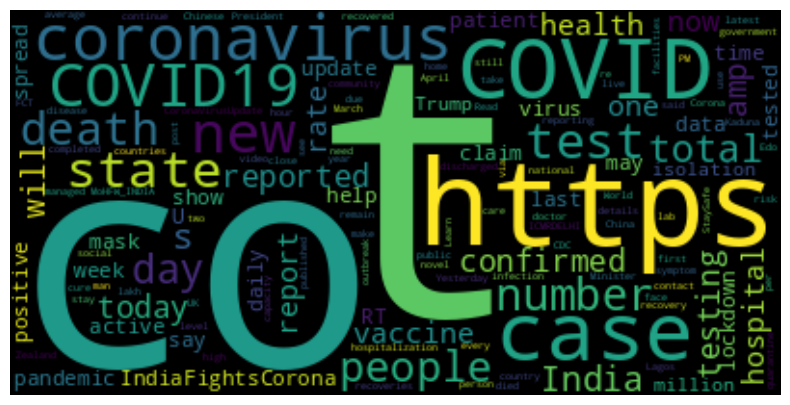

In [222]:
#generating word cloud for most frequently occuring words
from wordcloud import WordCloud
wc =WordCloud(collocations = False)
text = " ".join(sent for sent in data.tweet)
wc.generate(text)
fig = plt.figure(figsize=(20,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

##**Observations**
1. The Dependent variable is not a imbalanced data.
2. The most frequently occuring words are Covid,Coronavirus,test,confirmed,reported,people,state,health,case,tco.

In [223]:
#converting the label column into numeric format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']= le.fit_transform(data['label'])

In [224]:
data

,id,tweet,label,corpus
0,1,Chinese converting to Islam after realising th...,0,chines convert to islam after realis that no m...
1,2,11 out of 13 people (from the Diamond Princess...,0,out of peopl from the diamond princess cruis s...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0,covid is caus by a bacterium not viru and can ...
3,4,Mike Pence in RNC speech praises Donald Trump’...,0,mike penc in rnc speech prais donald trump s c...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1,sky s edconwayski explain the latest covid dat...
...,...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,0,donald trump wrongli claim that new zealand ha...
2136,2137,Current understanding is #COVID19 spreads most...,1,current understand is covid spread mostli from...
2137,2138,Nothing screams “I am sat around doing fuck al...,0,noth scream i am sat around do fuck all dure l...
2138,2139,Birx says COVID-19 outbreak not under control ...,0,birx say covid outbreak not under control beca...


#**Feature Engineering**

In [225]:
x = data['corpus']
y = data['label']

In [226]:
print(x.shape)
print(y.shape)

(2140,)
(2140,)


In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [228]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1605,)
(535,)
(1605,)
(535,)


In [229]:
#converting text into vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000,ngram_range=(1,5))
x_train = cv.fit_transform(x_train).toarray()

In [230]:
x_test = cv.transform(x_test).toarray()

#**Model Creation**

##**Logistic Regression**

In [231]:
from sklearn.linear_model import LogisticRegression
lrr = LogisticRegression(solver='liblinear')
lrr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [232]:
lrr.score(x_train,y_train)

0.9856697819314642

In [233]:
yp1=lrr.predict(x_test)
yp1=pd.DataFrame(yp1)
yp1

,0
0,0
1,1
2,0
3,1
4,0
...,...
530,0
531,1
532,1
533,1


In [234]:
y_test=pd.DataFrame(y_test)
y_test

,label
1532,0
1726,1
1414,0
2064,1
930,0
...,...
315,0
1541,1
453,0
175,1


In [235]:
p1=pd.merge(y_test,yp1,left_index=True,right_index=True)
p1

,label,0
240,0,0
247,1,0
211,1,1
354,0,1
350,1,1
...,...,...
261,0,1
300,1,1
315,0,1
453,0,0


In [236]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss
cm=confusion_matrix(y_test,yp1)
cm

array([[226,  36],
       [ 28, 245]])

In [237]:
print(classification_report(y_test,yp1))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       262
           1       0.87      0.90      0.88       273

    accuracy                           0.88       535
   macro avg       0.88      0.88      0.88       535
weighted avg       0.88      0.88      0.88       535



In [238]:
logloss=log_loss(y_test,yp1)
logloss

4.311764143744856

In [239]:
b=accuracy_score(y_test,yp1)
b

0.8803738317757009

In [240]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(lrr, x_train , y_train, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),5))


Accuracy values for 10-fold Cross Validation:
 [0.91927964 0.88810342 0.91931081 0.9378882  0.8385967  0.91254102
 0.88741176 0.95626199 0.89990572 0.8813476 ]

Final Average Accuracy of the model: 0.90406


In [241]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(lrr, x_test , y_test, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),5))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Accuracy values for 10-fold Cross Validation:
 [0.75851393 0.8137931  0.83316181 0.83339051 0.81430606 0.81118637
 0.80634095 0.81051213 0.8300676  0.8490566 ]

Final Average Accuracy of the model: 0.81603


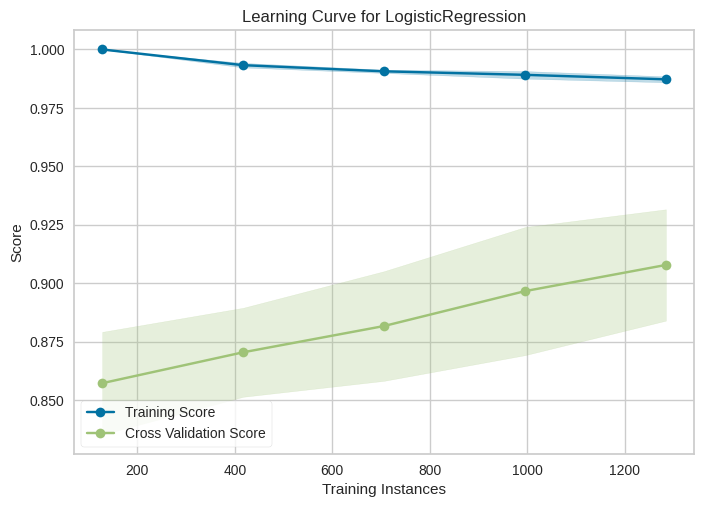

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [242]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    lrr, cv=5, scoring='f1_weighted', n_jobs=4
)

visualizer.fit(x_train, y_train)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

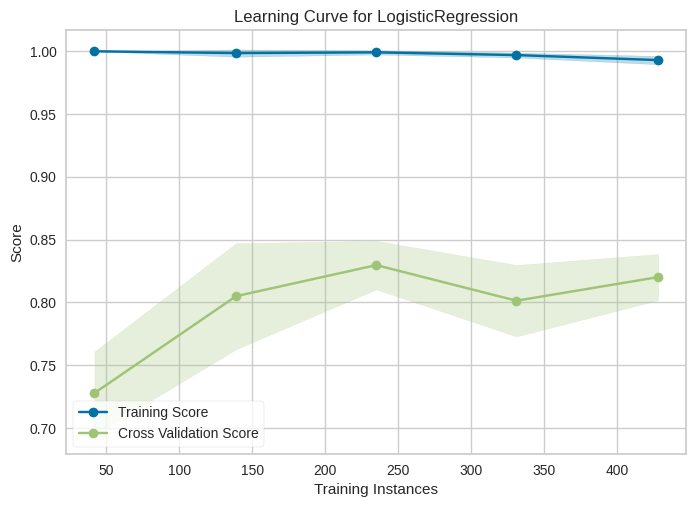

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [243]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    lrr, cv=5, scoring='f1_weighted', n_jobs=4
)

visualizer.fit(x_test, y_test)
visualizer.show()

## **SVM**

In [244]:
from sklearn.svm import SVC
svc=SVC(C=1.0,kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [245]:
svc.score(x_train, y_train)

0.9707165109034268

In [246]:
yp1=svc.predict(x_test)
yp1=pd.DataFrame(yp1)
yp1

,0
0,0
1,1
2,1
3,1
4,0
...,...
530,0
531,1
532,1
533,1


In [247]:
y_test=pd.DataFrame(y_test)
y_test

,label
1532,0
1726,1
1414,0
2064,1
930,0
...,...
315,0
1541,1
453,0
175,1


In [248]:
p1=pd.merge(y_test,yp1,left_index=True,right_index=True)
p1

,label,0
240,0,0
247,1,0
211,1,1
354,0,1
350,1,1
...,...,...
261,0,1
300,1,1
315,0,1
453,0,0


In [249]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss
cm=confusion_matrix(y_test,yp1)
cm

array([[228,  34],
       [ 36, 237]])

In [250]:
print(classification_report(y_test,yp1))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       262
           1       0.87      0.87      0.87       273

    accuracy                           0.87       535
   macro avg       0.87      0.87      0.87       535
weighted avg       0.87      0.87      0.87       535



In [251]:
logloss=log_loss(y_test,yp1)
logloss

4.715992032220936

In [252]:
b=accuracy_score(y_test,yp1)
b

0.8691588785046729

In [253]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(svc, x_train , y_train, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.93165056 0.85708753 0.91931081 0.89426247 0.80124224 0.8875
 0.85565517 0.88755281 0.87400794 0.8688577 ]

Final Average Accuracy of the model: 0.88


In [254]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(svc, x_test , y_test, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Accuracy values for 10-fold Cross Validation:
 [0.79622642 0.88873626 0.79636618 0.94438711 0.87023659 0.79230485
 0.78821872 0.79200888 0.8300676  0.79230485]

Final Average Accuracy of the model: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [255]:
from sklearn.model_selection import GridSearchCV
parameters = { 'C'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8.0.9,1,2,3,4,5,6,7,8,9,10],
              'degree' : [1,2,3,4,5]
                 }
svc = GridSearchCV(estimator=svc, param_grid = parameters, cv = 5, n_jobs=-1)
svc.fit(x_train, y_train)

print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          svc.best_estimator_)
print("\n The best score across ALL searched params:\n",
          svc.best_score_)
print("\n The best parameters across ALL searched params:\n",
          svc.best_params_)

SyntaxError: ignored